# Day 4: Classification 

In [1]:
#predicting Quantitative data -if the answer is YES or NO

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)

In [19]:
df=pd.read_csv('hr_data.csv')

### Explarotary Data Analysis(EDA)

In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [7]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,1.764626,6486.253519,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,0.790757,4674.776463,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,2851.500000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,5157.500000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,2.000000,8265.509696,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,3.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,-0.035466,0.497436,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,-0.005724,0.012307,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.021916,-0.016248,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,-0.000107,0.095570,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.047224,-0.015985,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,0.022628,-0.002227,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.026198,-0.017471,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.009005,-0.015469,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,-0.012346,0.955063,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [11]:
df.shape

(1470, 35)

In [20]:
df['Attrition'].value_counts()

No     1020
Yes     185
Name: Attrition, dtype: int64

In [21]:
df.Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465    NaN
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [22]:
d={'Yes':1,'No':0}
df['Attrition']=df['Attrition'].map(d)

In [23]:
df['Attrition']

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    NaN
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [25]:
filled=df[df['Attrition'].notnull()]

In [26]:
empty=df[df['Attrition'].isnull()]

In [27]:
filled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0


In [28]:
empty.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,NaN


In [29]:
filled.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [32]:
x=filled.drop('Attrition',axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [33]:
y=filled['Attrition']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

In [34]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [35]:
x.shape

(1205, 46)

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [42]:
g=GaussianNB()
b=BernoulliNB()

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
g.fit(x,y)

GaussianNB()

In [45]:
b.fit(x,y)

BernoulliNB()

In [46]:
predg=g.predict(x)

In [48]:
predb=b.predict(x)

In [49]:
accuracy_score(y,predg)

0.808298755186722

In [50]:
accuracy_score(y,predb)

0.8448132780082988

In [51]:
accuracy_score(y,predk)

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      1020
         1.0       0.42      0.68      0.52       185

    accuracy                           0.81      1205
   macro avg       0.68      0.76      0.70      1205
weighted avg       0.86      0.81      0.83      1205



In [54]:
print(classification_report(y,predb))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1020
         1.0       0.49      0.30      0.37       185

    accuracy                           0.84      1205
   macro avg       0.69      0.62      0.64      1205
weighted avg       0.82      0.84      0.83      1205



In [52]:
confusion_matrix(y,predg)

array([[848, 172],
       [ 59, 126]], dtype=int64)

In [53]:
confusion_matrix(y,predb)

array([[962,  58],
       [129,  56]], dtype=int64)

<AxesSubplot:>

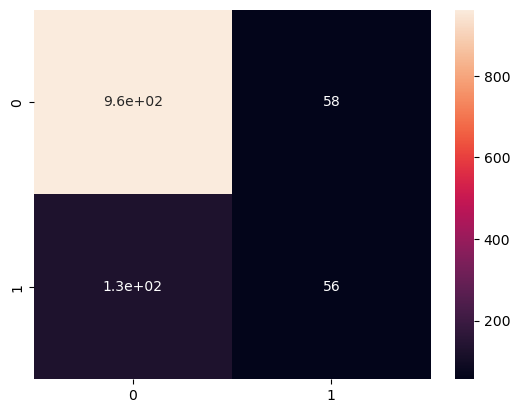

In [55]:
import seaborn as sns
sns.heatmap(confusion_matrix(y,predb), annot=True)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier()

In [59]:
knn.fit(x,y)

KNeighborsClassifier()

In [60]:
predk=knn.predict(x)

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
accuracy_score(y,predk)

0.8556016597510373

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
d=DecisionTreeClassifier()

In [64]:
d.fit(x,y)

DecisionTreeClassifier()

In [65]:
predd=d.predict(x)


In [67]:
accuracy_score(y,predd)

1.0

In [69]:
print(classification_report(y,predd))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1020
         1.0       1.00      1.00      1.00       185

    accuracy                           1.00      1205
   macro avg       1.00      1.00      1.00      1205
weighted avg       1.00      1.00      1.00      1205



<AxesSubplot:>

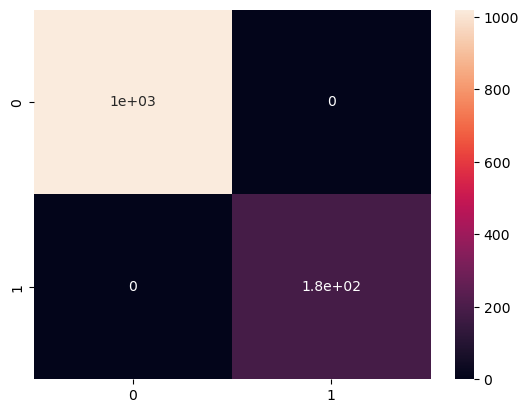

In [70]:
sns.heatmap(confusion_matrix(y,predd), annot=True)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
r=RandomForestClassifier()
r.fit(x,y)

RandomForestClassifier()

In [73]:
predr=r.predict(x)

In [74]:
accuracy_score(y,predr)

1.0

In [75]:
print(classification_report(y,predr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1020
         1.0       1.00      1.00      1.00       185

    accuracy                           1.00      1205
   macro avg       1.00      1.00      1.00      1205
weighted avg       1.00      1.00      1.00      1205



In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gr=GradientBoostingClassifier()
gr.fit(x,y)

GradientBoostingClassifier()

In [80]:
predgr=gr.predict(x)

In [81]:
accuracy_score(y,predgr)

0.9609958506224067

In [82]:
x=empty.drop('Attrition',axis=1)

In [83]:
x=pd.get_dummies(x,drop_first=True)

In [84]:
pred=r.predict(x)

In [85]:
empty['Attrition']=pred

C:\Users\gilbe\AppData\Local\Temp\ipykernel_17096\3990556093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty['Attrition']=pred


In [86]:
empty.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,0.0
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,0.0
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,0.0
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,0.0
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,0.0


In [88]:
d={0.0:'No',1.0:'Yes'}

In [89]:
empty['Attrition']=empty['Attrition'].map(d)

C:\Users\gilbe\AppData\Local\Temp\ipykernel_17096\3325167629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty['Attrition']=empty['Attrition'].map(d)


In [90]:
empty.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,No
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,No
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,No
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,No
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,No


In [91]:
#filling missing values 7 different strategies - mean, median,fforward,backfoward